In [ ]:
import pandas as pd

# Load your AR6 Explorer CSV
df = pd.read_csv("combined.csv")

# Optional: check what's in the file
print(df.columns)  # should include Model, Scenario, Variable, Region, Unit, Year, Value

# Filter to just the World region and the years you care about
df = df[df["Region"] == "World"]


FileNotFoundError: [Errno 2] No such file or directory: 'ar6_snapshot_1744036525.csv'

In [ ]:
df_filtered = df[["Model", "Scenario", "Variable", "2030", "2050"]]
total_scenarios = df_filtered[["Model", "Scenario"]].drop_duplicates().shape[0]

# Check how many variables were selected
selected_variables = df_filtered["Variable"].unique()
n_vars = len(selected_variables)

# Pivot so each row = one (Model, Scenario), and each column = Variable-Year
df_melt = df_filtered.melt(id_vars=["Model", "Scenario", "Variable"], var_name="Year", value_name="Value")
df_pivot = df_melt.pivot_table(index=["Model", "Scenario"], columns=["Variable", "Year"], values="Value")
print(total_scenarios)

NameError: name 'df' is not defined

In [ ]:
drop_keywords = ["Chemicals", "Steel", "Pulp and Paper"]
cols_to_drop = [col for col in df_pivot.columns if any(k in col[0] for k in drop_keywords)]

# Optionally: drop 'Residential and Commercial' if needed
# cols_to_drop += [col for col in df_pivot.columns if "Residential and Commercial" in col[0]]

df_reduced = df_pivot.drop(columns=cols_to_drop)
n_vars_reduced = df_reduced.shape[1]//2

In [ ]:
df_complete = df_reduced.dropna()

# Check how many full scenarios remain
print(f"Scenarios with full data for {n_vars_reduced} variables in both 2030 and 2050: {len(df_complete)}")

Scenarios with full data for 5 variables in both 2030 and 2050: 873


In [ ]:
df_complete

Variable                           Emissions|CO2|AFOLU               \
Year                                              2030         2050   
Model              Scenario                                           
AIM/CGE 2.1        CO_Bridge                950.373900 -2755.040200   
                   CO_CurPol               2597.105400  1368.453700   
AIM/Hub-Global 2.0 1.5C                     227.442800 -3023.090700   
                   2.5C                    2567.672100   552.348600   
                   2C                      1043.837700 -1128.311900   
...                                                ...          ...   
WITCH 5.0          EN_NPi2020_800f        -1201.380959 -2823.135447   
                   EN_NPi2020_900         -1203.443450 -2820.302856   
                   EN_NPi2020_900f        -1191.883596 -2853.022564   
                   EN_NPi2100              2606.275046  2145.944583   
                   EN_NoPolicy             2600.163123  2125.242602   

Variable                           Emissions|CO2|Energy|Demand|Industry  \
Year                                                               2030   
Model              Scenario                                               
AIM/CGE 2.1        CO_Bridge                                6125.464800   
                   CO_CurPol                                8998.294000   
AIM/Hub-Global 2.0 1.5C                                     4350.617300   
                   2.5C                                     7480.736100   
                   2C                                       5936.736900   
...                                                                 ...   
WITCH 5.0          EN_NPi2020_800f                          3339.938384   
                   EN_NPi2020_900                           3296.595073   
                   EN_NPi2020_900f                          3371.431169   
                   EN_NPi2100                               5842.770097   
                   EN_NoPolicy                              5855.167853   

Variable                                         \
Year                                       2050   
Model              Scenario                       
AIM/CGE 2.1        CO_Bridge        3035.614400   
                   CO_CurPol        8930.645600   
AIM/Hub-Global 2.0 1.5C              881.883300   
                   2.5C             6788.627700   
                   2C               4829.335200   
...                                         ...   
WITCH 5.0          EN_NPi2020_800f  2442.881530   
                   EN_NPi2020_900   2400.538888   
                   EN_NPi2020_900f  2506.599696   
                   EN_NPi2100       6418.884525   
                   EN_NoPolicy      6433.998878   

Variable                           Emissions|CO2|Energy|Demand|Residential and Commercial  \
Year                                                                                 2030   
Model              Scenario                                                                 
AIM/CGE 2.1        CO_Bridge                                              2314.414000       
                   CO_CurPol                                              2796.500200       
AIM/Hub-Global 2.0 1.5C                                                   2026.150700       
                   2.5C                                                   2791.086600       
                   2C                                                     2616.026700       
...                                                                               ...       
WITCH 5.0          EN_NPi2020_800f                                        3203.405691       
                   EN_NPi2020_900                                         3131.336215       
                   EN_NPi2020_900f                                        3272.976956       
                   EN_NPi2100                                             3576.268832       
                   EN_NoPolicy

## Using Pyam

In [ ]:
import pyam

In [ ]:
conn = pyam.iiasa.Connection('ar6-public')

[INFO] 15:58:57 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 15:58:57 - pyam.iiasa: You are connected as an anonymous user


In [ ]:
conn.variables()

0       AR6 climate diagnostics|Effective Radiative Fo...
1       AR6 climate diagnostics|Effective Radiative Fo...
2       AR6 climate diagnostics|Effective Radiative Fo...
3       AR6 climate diagnostics|Effective Radiative Fo...
4       AR6 climate diagnostics|Effective Radiative Fo...
                              ...                        
1651                                              Welfare
1652                       Yield|Bioenergy|2nd generation
1653                                         Yield|Cereal
1654                                       Yield|Oilcrops
1655                                     Yield|Sugarcrops
Name: variable, Length: 1656, dtype: object

In [ ]:
conn.scenarios()

0                                1
1                EN_INDCi2030_1000
2                EN_INDCi2030_500f
3                EN_INDCi2030_600f
4                EN_INDCi2030_700f
                   ...            
1384              SSP2_SPA2_19I_RE
1385       Directed Transition 1.0
1386                     2C-hybrid
1387    DISCRATE_cb600_cdrall_dr4p
1388                      SSP2_5.0
Name: scenario, Length: 1389, dtype: object

Loading in from local file

In [ ]:
from pyam import IamDataFrame

df = IamDataFrame(data='/Users/georgiaray_ic/Desktop/AR6/AR6_Scenarios_Database_World_v1.1.csv')


[INFO] 16:05:38 - pyam.core: Reading file /Users/georgiaray_ic/Desktop/AR6/AR6_Scenarios_Database_World_v1.1.csv


In [ ]:
# Number of unique scenarios
print("Number of scenarios:", len(set(df.scenario)))

# Preview first 10 scenario names
print("Scenario names:", df.scenario[:10])

# Number of unique variables
print("Number of variables:", len(set(df.variable)))

# Preview first 10 variable names
print("Variable names:", df.variable[:10])


Number of scenarios: 939
Scenario names: ['1', '1.5C', '1.5C A', '1.5C B', '1.5C C', '1.5C OPEC sell-out', '1.5CNow_Gradual', '1.5CNow_OptTax', '2.5C', '20% abatement (FF&I)']
Number of variables: 1393
Variable names: ['AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile', 'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile', 'AR6 climate diagno

So this confirms that the better approach is loading directly from the connection. Going to proceed with conn. 

In [ ]:
variables = conn.variables()

In [ ]:
import os
import time
import pandas as pd
from pyam import IamDataFrame
from pyam.iiasa import Connection

# === CONFIG ===
OUTPUT_DIR = "ar6_data"
os.makedirs(OUTPUT_DIR, exist_ok=True)

SLEEP_BETWEEN_REQUESTS = 1  # polite delay to avoid hammering the server

# Track skipped ones
skipped = []

In [ ]:

for var in variables:
    safe_filename = var.replace("|", "__").replace("/", "_").replace(" ", "_")
    output_path = os.path.join(OUTPUT_DIR, f"{safe_filename}.csv")

    if os.path.exists(output_path):
        print(f"✅ Already downloaded: {var}")
        continue

    try:
        print(f"⬇️  Downloading: {var}")
        df = conn.query(variable=var)

        # If empty, still mark as done
        if df.empty:
            print(f"⚠️ No data for: {var}")
            pd.DataFrame().to_csv(output_path, index=False)
        else:
            df.data.to_csv(output_path, index=False)

    except Exception as e:
        print(f"❌ Failed on variable: {var} — {e}")
        skipped.append(var)

    time.sleep(SLEEP_BETWEEN_REQUESTS)

# Save skipped variables so you can retry them later
if skipped:
    pd.Series(skipped).to_csv("skipped_variables.csv", index=False)
    print(f"🚨 Skipped {len(skipped)} variables. Saved to 'skipped_variables.csv'")
else:
    print("🎉 All variables downloaded successfully!")


✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|CICERO-SCM|50.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|Basket|Greenhouse Gases|FaIRv1.6.2|50.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|CICERO-SCM|50.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|Basket|Non-CO2 Greenhouse Gases|FaIRv1.6.2|50.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|CH4|CICERO-SCM|50.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|CH4|FaIRv1.6.2|50.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|33.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective Radiative Forcing|CICERO-SCM|5.0th Percentile
✅ Already downloaded: AR6 climate diagnostics|Effective R

In [ ]:
import pandas as pd
from pathlib import Path

# Folder where your downloaded variable CSVs are stored
variable_folder = Path("/Users/georgiaray_ic/Documents/coding/PRIM/ar6_data")
csv_files = list(variable_folder.glob("*.csv"))

# Store successfully loaded DataFrames
dataframes = []
skipped_files = []

for file in csv_files:
    try:
        df = pd.read_csv(file)

        # Skip empty or malformed files
        if df.empty or df.shape[1] < 6:
            skipped_files.append(file.name)
            continue

        # Ensure column names are lowercase and consistent
        df.columns = [col.lower() for col in df.columns]

        # Check required columns are present
        required_cols = {"model", "scenario", "region", "unit", "year", "value"}
        if not required_cols.issubset(set(df.columns)):
            skipped_files.append(file.name)
            continue

        # Infer variable name from filename
        variable_name = file.stem.replace("__", "|").replace("_", " ")

        # Add variable column explicitly
        df["variable"] = variable_name

        # Add source file column for traceability
        df["source_file"] = file.name

        # Standardize column order (optional but tidy)
        df = df[["model", "scenario", "region", "variable", "unit", "year", "value", "source_file"]]

        dataframes.append(df)
        print(f"Loaded {file.name}")

    except Exception as e:
        print(f"Failed to load {file.name}: {e}")
        skipped_files.append(file.name)

# Combine all loaded DataFrames
all_data = pd.concat(dataframes, ignore_index=True)

print(f"Loaded {len(dataframes)} variable files.")
print(f"Skipped {len(skipped_files)} files.")


Loaded Water_Withdrawal__Heat__Oil.csv
Loaded AR6_climate_diagnostics__Infilled__Emissions__Kyoto_Gases_(AR5-GWP100).csv
Loaded Final_Energy__Residential_and_Commercial__Residential__Gases.csv
Loaded Investment__Energy_Efficiency.csv
Loaded Secondary_Energy__Hydrogen__Solar.csv
Loaded AR6_climate_diagnostics__Effective_Radiative_Forcing__CICERO-SCM__67.0th_Percentile.csv
Loaded Final_Energy__Transportation__Aviation.csv
Loaded Primary_Energy__Oil__w_o_CCS.csv
Loaded Secondary_Energy__Heat__Other.csv
Loaded Cumulative_Capacity__Electricity__Biomass__w__CCS.csv
Loaded Forestry_Production__Roundwood.csv
Loaded Capacity__Electricity__Storage_Capacity.csv
Loaded Investment__Clean_Energy.csv
Loaded AR6_climate_diagnostics__Exceedance_Probability_2.0C__CICERO-SCM.csv
Loaded Yield__Bioenergy__2nd_generation.csv
Loaded Water_Consumption__Liquids__Biomass__w__CCS.csv
Loaded Cumulative_Capacity__Hydrogen__Biomass__w_o_CCS.csv
Loaded Secondary_Energy__Heat.csv
Loaded Capacity_Additions__Electricit

In [ ]:
#save the combined DataFrame to a CSV
all_data.to_csv("combined_ar6_data.csv", index=False)

Start from here

In [1]:
import pandas as pd
from pathlib import Path

In [3]:
df = pd.read_csv("../combined_ar6_data.csv")

In [4]:
df.head()

,model,scenario,region,variable,unit,year,value,source_file
0,MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_CB400,World,Water Withdrawal|Heat|Oil,km3/yr,2000,0.000620,Water_Withdrawal__Heat__Oil.csv
1,MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_CB400,World,Water Withdrawal|Heat|Oil,km3/yr,2005,0.000505,Water_Withdrawal__Heat__Oil.csv
2,MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_CB400,World,Water Withdrawal|Heat|Oil,km3/yr,2010,0.000174,Water_Withdrawal__Heat__Oil.csv
3,MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_CB400,World,Water Withdrawal|Heat|Oil,km3/yr,2020,0.109874,Water_Withdrawal__Heat__Oil.csv
4,MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_CB400,World,Water Withdrawal|Heat|Oil,km3/yr,2030,0.139871,Water_Withdrawal__Heat__Oil.csv


In [5]:
#testing different permutations of 20 variables to retain the most scenarios 
df_pivot = (
    df
    .query("year in [2030, 2050]")  
    .pivot_table(index=["model", "scenario"], 
                 columns=["variable", "year"], 
                 values="value")
)


In [6]:
from collections import Counter

# Extract variables that appear for both years
year_counts = Counter(var for var, year in df_pivot.columns)
candidates = [var for var, count in year_counts.items() if count == 2]


In [7]:
core_vars = [
    "Secondary Energy|Electricity",
    "Final Energy|Transportation",
    "Final Energy|Industry",
    "Final Energy|Residential and Commercial",
    "Emissions|CO2|AFOLU"
]

years = [2030, 2050]


In [8]:
core_cols = [(var, year) for var in core_vars for year in years]
df_core = df_pivot.dropna(subset=core_cols)
print(f"Scenarios with full core data: {len(df_core)}")


Scenarios with full core data: 1580


In [139]:
# Get total number of scenarios in the pivoted dataset
n_total_scenarios = df_pivot.shape[0]

In [140]:
from collections import defaultdict

# Track how many scenarios each variable appears in for both years
variable_counts = defaultdict(int)

for var in candidates:
    try:
        cols = [(var, 2030), (var, 2050)]
        if all(col in df_pivot.columns for col in cols):
            notnull_rows = df_pivot[list(cols)].dropna()
            variable_counts[var] = len(notnull_rows)
    except:
        continue

# Filter to variables in at least half the scenarios
filtered_candidates = [var for var, count in variable_counts.items() if count >= n_total_scenarios / 2]
print(f"Retaining {len(filtered_candidates)} variables out of {len(candidates)}")


Retaining 131 variables out of 1652


In [141]:
import random

# Randomly sample N permutations of 20-variable subsets
N = 10000
sampled_combos = [random.sample(candidates, 10) for _ in range(N)]


In [ ]:
def retained_scenarios(df_pivot, candidate_vars, core_vars=None, years=[2030, 2050], threshold=8):
    candidate_cols = [(v, y) for v in candidate_vars for y in years]
    available_candidate_cols = [col for col in candidate_cols if col in df_pivot.columns]

    if core_vars:
        core_cols = [(v, y) for v in core_vars for y in years]

        if not all(col in df_pivot.columns for col in core_cols):
            return 0, None

        subset = df_pivot[core_cols + available_candidate_cols].copy()
        core_complete = subset[core_cols].notna().all(axis=1)
    else:
        subset = df_pivot[available_candidate_cols].copy()
        core_complete = pd.Series(True, index=subset.index)

    candidate_complete_count = subset[available_candidate_cols].notna().sum(axis=1)
    candidate_ok = candidate_complete_count >= threshold * len(years)

    valid_scenarios = subset[core_complete & candidate_ok]
    return len(valid_scenarios), valid_scenarios


In [143]:
results = []

for combo in sampled_combos:
    retained, _ = retained_scenarios(df_pivot, core_vars, combo, threshold=8)
    results.append({"variables": combo, "n_scenarios": retained})

sorted_results = sorted(results, key=lambda x: x["n_scenarios"], reverse=True)


In [144]:
top = sorted_results[:100]
for i, entry in enumerate(top):
    print(f"Combo {i+1}: {entry['n_scenarios']} scenarios — {entry['variables']}")

Combo 1: 870 scenarios — ['Capacity|Electricity|Wind|Onshore', 'Investment|Energy Supply|Electricity|Gas', 'Capacity|Electricity|Gas|w|CCS', 'Emissions|Sulfur|Energy|Demand|Industry', 'Primary Energy|Solar', 'Carbon Sequestration|CCS|Biomass|Energy|Supply', 'Emissions|CO2|AFOLU', 'Secondary Energy|Electricity|Gas|w|CCS', 'Lifetime|Electricity|Coal|w|CCS', 'Emissions|CO2|Energy|Demand|Transportation|Road|Passenger|2W&3W']
Combo 2: 841 scenarios — ['AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|16.7th Percentile', 'AR6 climate diagnostics|Exceedance Probability 2.5C|FaIRv1.6.2', 'Final Energy|Hydrogen', 'Secondary Energy|Electricity', 'Final Energy|Industry|Solids|Biomass', 'Water Consumption|Irrigation', 'Concentration|CH4', 'Carbon Intensity|Production|Steel|Fossil|Energy|Demand|Industry', 'Secondary Energy|Electricity|Biomass', 'Cumulative Capacity|Electricity|Gas|w|CCS']
Combo 3: 702 scenarios — ['Emissions|CO2|Energy|Demand|Industry|Cement', 'Emissions|NH3|Energy|Dem

In [145]:
# Get top 22 combinations with >400 scenarios
top_22 = [r for r in sorted_results if r["n_scenarios"] > 400][:22]

# Flatten all variable lists into one big list
all_vars = [var for combo in top_22 for var in combo["variables"]]

# Convert to a unique set and sort alphabetically
unique_vars = sorted(set(all_vars))

# Print them one per line
print(f"{len(unique_vars)} unique variables used across top 22 combos:\n")
for v in unique_vars:
    print(v)


190 unique variables used across top 22 combos:

AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile
AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile
AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|95.0th Percentile
AR6 climate diagnostics|Exceedance Probability 1.5C|MAGICCv7.5.3
AR6 climate diagnostics|Exceedance Probability 2.0C|FaIRv1.6.2
AR6 climate diagnostics|Exceedance Probability 2.0C|MAGICCv7.5.3
AR6 climate diagnostics|Exceedance Probability 2.5C|FaIRv1.6.2
AR6 climate diagnostics|Infilled|Emissions|F-Gases
AR6 climate diagnostics|Surface Temperature (GSAT)|CICERO-SCM|67.0th Percentile
AR6 climate diagnostics|Surface Temperature (GSAT)|CICERO-SCM|90.0th Percentile
AR6 climate diagnostics|Surface Temperature (GSAT)|CICERO-SCM|95.0th Percentil

Final variable selection

In [146]:
group_a = [
    "Capacity|Electricity|Nuclear",
    "Capacity|Electricity|Coal",
    "Final Energy|Transportation|Freight",
    "Transport|Stock|Road|Passenger|2W&3W",
    "Emissions|NOx|Energy|Demand|Industry",
    "Final Energy|Industry|Electricity",
    "Final Energy|Residential and Commercial|Liquids",
    "Emissions|Sulfur|Energy|Demand|Residential and Commercial|Residential",
    "Land Cover|Cropland|Energy Crops",
    "Emissions|CH4|AFOLU|Agriculture|Livestock|Enteric Fermentation"
]

group_b = [
    "Secondary Energy|Electricity|Biomass|w|CCS",
    "Capacity|Electricity|Solar|PV",
    "Final Energy|Transportation|Hydrogen",
    "Price|Final Energy|Residential and Commercial|Residential|Solids|Coal",
    "Final Energy|Industry|Other",
    "Investment|Energy Supply|Electricity|Non-fossil",
    "Final Energy|Residential and Commercial|Hydrogen",
    "Secondary Energy|Hydrogen",
    "Emissions|CO|Energy|Demand|Industry",
    "Land Cover|Pasture"
]

group_c = [
    "Emissions|PM2.5|Energy|Demand|Residential and Commercial",
    "Disability-Adjusted Life Year|PM2.5",
    "Emissions|Sulfur|Energy|Supply",
    "Final Energy|Transportation|Passenger|Other",
    "Final Energy|Industry|Chemicals|Ammonia|Solids|Fossil",
    "OM Cost|Fixed|Electricity|Solar|PV",
    "Forestry Production|Roundwood",
    "Land Cover|Water Ecosystems|Wetlands|Peatlands",
    "Population|Urban|Share",
    "Trade|Value|Imports"
]

group_d = [
    # Electricity
    "Capacity|Electricity|Solar|PV",
    "Investment|Energy Supply|Electricity|Non-fossil",

    # Transport
    "Final Energy|Transportation|Hydrogen",
    "Final Energy|Transportation|Freight",

    # Industry
    "Final Energy|Industry|Electricity",
    "Emissions|NOx|Energy|Demand|Industry",

    # Residential & Commercial
    "Final Energy|Residential and Commercial|Liquids",
    "Final Energy|Residential and Commercial|Hydrogen",

    # AFOLU
    "Land Cover|Cropland|Energy Crops",
    "Emissions|CH4|AFOLU|Agriculture|Livestock|Enteric Fermentation"
]

group_e = [
    # Electricity
    "Secondary Energy|Electricity|Biomass|w|CCS",
    "OM Cost|Fixed|Electricity|Solar|PV",

    # Transport
    "Final Energy|Transportation|Freight",
    "Emissions|CO2|Energy|Demand|Transportation|Road|Passenger|2W&3W",

    # Industry
    "Final Energy|Industry|Chemicals|Ammonia|Solids|Fossil",
    "Emissions|CO|Energy|Demand|Industry",

    # Residential & Commercial
    "Final Energy|Residential and Commercial|Hydrogen",
    "Final Energy|Residential and Commercial|Lighting",

    # AFOLU
    "Land Cover|Pasture",
    "Emissions|NH3|Energy|Demand|Residential and Commercial"
]

group_f = [
    # Electricity
    "Capacity Additions|Electricity|Solar",
    "Capital Formation",

    # Transport
    "Final Energy|Transportation|Passenger|Liquids|Biomass",
    "Price|Final Energy|Residential and Commercial|Residential|Solids|Coal",

    # Industry
    "Investment|Energy Supply|Extraction|Gas",
    "Final Energy|Industry|Other",

    # Residential & Commercial
    "Final Energy|Residential and Commercial|Solids|Coal",
    "Emissions|Sulfur|Energy|Demand|Residential and Commercial|Commercial",

    # AFOLU
    "Land Cover|Other Land",
    "Forestry Production|Roundwood"
]

years = [2030, 2050]
threshold = 8  # out of 10

In [147]:
# Run it
n_retained, valid_df = retained_scenarios(df_pivot, core_vars, group_a, threshold=8)
print(f"Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): {n_retained}")


Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): 160


In [148]:
n_retained, valid_df = retained_scenarios(df_pivot, core_vars, group_b, threshold=8)
print(f"Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): {n_retained}")

Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): 570


In [149]:
n_retained, valid_df = retained_scenarios(df_pivot, core_vars, group_c, threshold=8)
print(f"Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): {n_retained}")

Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): 0


In [170]:
n_retained, d_df = retained_scenarios(df_pivot, core_vars, group_d, threshold=8)
print(f"Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): {n_retained}")

Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): 0


In [151]:
n_retained, valid_df = retained_scenarios(df_pivot, core_vars, group_e, threshold=8)
print(f"Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): {n_retained}")

Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): 39


In [168]:
n_retained, valid_df = retained_scenarios(df_pivot, core_vars, group_f, threshold=8)
print(f"Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): {n_retained}")

Scenarios retained with full core + ≥8/10 additional variables (2030 + 2050): 0


In [169]:
def full_coverage(df, core_vars, candidate_vars, years=[2030, 2050]):
    all_cols = [(v, y) for v in core_vars + candidate_vars for y in years]
    available_cols = [col for col in all_cols if col in df.columns]
    df_full = df.dropna(subset=available_cols)
    return len(df_full), df_full

n_full, d_df_full = full_coverage(d_df, core_vars, group_d)
print(f"Group D: {n_full} scenarios with full coverage of all 10 additional variables (2030 & 2050)")

Group D: 150 scenarios with full coverage of all 10 additional variables (2030 & 2050)


In [154]:
group_d_cols = [(v, y) for v in group_d for y in years]
missing_mask = d_df[group_d_cols].isna()

# Collapse to a single column per variable: True if missing in either year
missing_by_var = pd.DataFrame({
    var: missing_mask[[(var, 2030), (var, 2050)]].any(axis=1)
    for var in group_d
})

# Keep only rows where at least one variable is missing
missing_summary = missing_by_var[missing_by_var.any(axis=1)]

print("Missing variables per scenario (first few rows):")
display(missing_summary.head())

Missing variables per scenario (first few rows):


Capacity|Electricity|Solar|PV  \
model       scenario                                     
AIM/CGE 2.1 CO_2Deg2020                          False   
            CO_2Deg2030                          False   
            CO_BAU                               False   
            CO_Bridge                            False   
            CO_CurPol                            False   

                         Investment|Energy Supply|Electricity|Non-fossil  \
model       scenario                                                       
AIM/CGE 2.1 CO_2Deg2020                                            False   
            CO_2Deg2030                                            False   
            CO_BAU                                                 False   
            CO_Bridge                                              False   
            CO_CurPol                                              False   

                         Final Energy|Transportation|Hydrogen  \
model       scenario                                            
AIM/CGE 2.1 CO_2Deg2020                                 False   
            CO_2Deg2030                                 False   
            CO_BAU                                      False   
            CO_Bridge                                   False   
            CO_CurPol                                   False   

                         Final Energy|Transportation|Freight  \
model       scenario                                           
AIM/CGE 2.1 CO_2Deg2020                                False   
            CO_2Deg2030                                False   
            CO_BAU                                     False   
            CO_Bridge                                  False   
            CO_CurPol                                  False   

                         Final Energy|Industry|Electricity  \
model       scenario                                         
AIM/CGE 2.1 CO_2Deg2020                              False   
            CO_2Deg2030                              False   
            CO_BAU                                   False   
            CO_Bridge                                False   
            CO_CurPol                                False   

                         Emissions|NOx|Energy|Demand|Industry  \
model       scenario                                            
AIM/CGE 2.1 CO_2Deg2020                                 False   
            CO_2Deg2030                                 False   
            CO_BAU                                      False   
            CO_Bridge                                   False   
            CO_CurPol                                   False   

                         Final Energy|Residential and Commercial|Liquids  \
model       scenario                                                       
AIM/CGE 2.1 CO_2Deg2020                                            False   
            CO_2Deg2030                                            False   
            CO_BAU                                                 False   
            CO_Bridge                                              False   
            CO_CurPol                                              False   

                         Final Energy|Residential and Commercial|Hydrogen  \
model       scenario                                                        
AIM/CGE 2.1 CO_2Deg2020                                             False   
            CO_2Deg2030                                             False   
            CO_BAU                                                  False   
            CO_Bridge                                               False   
            CO_CurPol                                               False   

                         Land Cover|Cropland|Energy Crops  \
model       scenario                                        
AIM/CGE 2.1 CO_2Deg2020                             False   
            CO_2Deg2030          

In [155]:
# Create full column list for group_d: (variable, year)
group_d_cols = [(v, y) for v in group_d for y in years]

# Create a mask of missing values
missing_mask = d_df[group_d_cols].isna()

# Count missing per variable (i.e., missing in 2030 OR 2050)
missing_counts = {
    var: missing_mask[[(var, 2030), (var, 2050)]].any(axis=1).sum()
    for var in group_d
}

# Convert to DataFrame for easy viewing
missing_table = pd.DataFrame.from_dict(missing_counts, orient='index', columns=["Missing Scenarios"])
missing_table = missing_table.sort_values("Missing Scenarios", ascending=False)

missing_table


,Missing Scenarios
Emissions|CH4|AFOLU|Agriculture|Livestock|Enteric Fermentation,340
Final Energy|Transportation|Freight,232
Investment|Energy Supply|Electricity|Non-fossil,125
Emissions|NOx|Energy|Demand|Industry,88
Final Energy|Residential and Commercial|Hydrogen,79
Land Cover|Cropland|Energy Crops,36
Capacity|Electricity|Solar|PV,0
Final Energy|Transportation|Hydrogen,0
Final Energy|Industry|Electricity,0
Final Energy|Residential and Commercial|Liquids,0


In [156]:
#print the list of d variables nicely 
final_variables = core_vars + group_d
print("Selecting Variables:")
for var in final_variables:
    print(f"- {var}")

Selecting Variables:
- Secondary Energy|Electricity
- Final Energy|Transportation
- Final Energy|Industry
- Final Energy|Residential and Commercial
- Emissions|CO2|AFOLU
- Capacity|Electricity|Solar|PV
- Investment|Energy Supply|Electricity|Non-fossil
- Final Energy|Transportation|Hydrogen
- Final Energy|Transportation|Freight
- Final Energy|Industry|Electricity
- Emissions|NOx|Energy|Demand|Industry
- Final Energy|Residential and Commercial|Liquids
- Final Energy|Residential and Commercial|Hydrogen
- Land Cover|Cropland|Energy Crops
- Emissions|CH4|AFOLU|Agriculture|Livestock|Enteric Fermentation


In [ ]:
df_final = d_df[final_variables].copy()
print(f"Filtered to {df_final.shape[0]} scenarios with ≥8/10 of group_d + full core")
# Flatten multiindex columns into readable strings
df_final.columns = [f"{var} ({year})" for var, year in df_final.columns]
# Reset index to get model/scenario as columns
df_final = df_final.reset_index()

Filtered to 739 scenarios with ≥8/10 of group_d + full core


In [158]:
df_final

,model,scenario,Secondary Energy|Electricity (2030),Secondary Energy|Electricity (2050),Final Energy|Transportation (2030),Final Energy|Transportation (2050),Final Energy|Industry (2030),Final Energy|Industry (2050),Final Energy|Residential and Commercial (2030),Final Energy|Residential and Commercial (2050),...,Emissions|NOx|Energy|Demand|Industry (2030),Emissions|NOx|Energy|Demand|Industry (2050),Final Energy|Residential and Commercial|Liquids (2030),Final Energy|Residential and Commercial|Liquids (2050),Final Energy|Residential and Commercial|Hydrogen (2030),Final Energy|Residential and Commercial|Hydrogen (2050),Land Cover|Cropland|Energy Crops (2030),Land Cover|Cropland|Energy Crops (2050),Emissions|CH4|AFOLU|Agriculture|Livestock|Enteric Fermentation (2030),Emissions|CH4|AFOLU|Agriculture|Livestock|Enteric Fermentation (2050)
0,AIM/CGE 2.1,CO_2Deg2020,37.310500,57.749767,38.009333,41.005967,55.836867,57.939667,40.854433,42.940433,...,3.500567,2.175733,-0.833133,-0.435800,0.0,0.0,15.821767,134.768667,NaN,NaN
1,AIM/CGE 2.1,CO_2Deg2030,37.325900,67.632533,44.372300,30.404967,67.906700,48.032233,44.792200,38.032367,...,5.726633,1.476200,-1.138833,-0.010000,0.0,0.0,12.847233,186.783367,NaN,NaN
2,AIM/CGE 2.1,CO_BAU,37.922600,49.778700,48.277867,56.623533,69.512567,77.166167,46.016933,50.110800,...,5.949767,4.431233,-1.683667,-0.813567,0.0,0.0,3.682967,18.892667,NaN,NaN
3,AIM/CGE 2.1,CO_Bridge,35.280533,47.039233,40.763967,37.967033,58.827000,50.670967,41.038000,37.758433,...,4.180833,2.165000,-0.660067,-0.006400,0.0,0.0,14.548133,107.604633,NaN,NaN
4,AIM/CGE 2.1,CO_CurPol,36.918100,49.538800,46.825300,54.505567,69.805233,77.081767,45.999533,50.140633,...,6.135567,4.443333,-0.946033,-0.450700,0.0,0.0,11.332567,22.091400,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,WITCH 5.0,EN_NPi2020_800f,14.462411,32.368588,12.992089,8.971838,9.941696,14.721293,17.021262,24.617229,...,2.461968,1.554282,2.344650,2.536190,NaN,NaN,3.886000,21.721546,NaN,NaN
735,WITCH 5.0,EN_NPi2020_900,0.014589,0.546447,12.868889,8.800943,9.849215,14.743784,16.752343,24.616775,...,2.437577,1.544254,2.280688,2.431983,NaN,NaN,3.919066,21.981857,NaN,NaN
736,WITCH 5.0,EN_NPi2020_900f,14.632853,32.182417,13.235315,9.427602,10.076488,14.837895,17.367148,24.730249,...,2.481176,1.571323,2.405026,2.663226,NaN,NaN,3.620887,19.326743,NaN,NaN
737,WITCH 5.0,EN_NPi2100,19.941675,32.209576,14.108293,13.862896,19.291599,24.921025,19.381161,25.424408,...,2.881069,2.050714,2.622711,3.551264,NaN,NaN,1.132030,6.759771,NaN,NaN


In [ ]:
# Save main data
df_final.to_csv("selected_ar6_data.csv", index=False)

# Also save a clean list of variables used
variables_used = [f"{v} ({y})" for v in final_variables for y in years]
pd.Series(variables_used, name="Variable").to_csv("selected_variables.csv", index=False)


In [160]:
summary = {
    "Total scenarios (before filtering)": n_total_scenarios,
    "Scenarios with full core data": len(df_core),
    "Final selection (core + group_d ≥8 vars)": df_final.shape[0],
    "Variables used": len(variables_used)
}
pd.Series(summary).to_csv("dataset_summary.csv")


___

In [176]:
def coverage_for_variable(df_pivot, variable, years=[2030, 2050]):
    # Build column list for the variable across years
    cols = [(variable, year) for year in years]

    # Check that both columns exist
    if not all(col in df_pivot.columns for col in cols):
        missing = [str(col) for col in cols if col not in df_pivot.columns]
        print(f"Missing columns for variable '{variable}': {missing}")
        return 0

    # Subset and count complete rows
    complete_rows = df_pivot[cols].dropna()
    return len(complete_rows)


In [178]:
def variable_coverage_table(df_pivot, years=[2030, 2050]):
    # Extract base variable names
    base_vars = sorted(set(var for var, year in df_pivot.columns if year in years))

    coverage_counts = []

    for var in base_vars:
        cols = [(var, year) for year in years]
        if all(col in df_pivot.columns for col in cols):
            count = df_pivot[cols].dropna().shape[0]
        else:
            count = 0
        coverage_counts.append({"Variable": var, "Coverage (Scenarios)": count})

    # Convert to DataFrame and sort
    coverage_df = pd.DataFrame(coverage_counts)
    coverage_df = coverage_df.sort_values("Coverage (Scenarios)", ascending=False).reset_index(drop=True)

    return coverage_df

In [224]:
variable_table = variable_coverage_table(df_pivot, years=[2030, 2050])

In [225]:
def tag_variable_sector(variable_table, sector_proxy_keywords):
    # Copy to avoid modifying original
    tagged = variable_table.copy()
    tagged["Sector"] = None  # New column to assign

    # Assign based on explicit keywords first
    tagged.loc[tagged["Variable"].str.contains("Electricity", case=False), "Sector"] = "electricity"
    tagged.loc[tagged["Variable"].str.contains("Transportation", case=False), "Sector"] = "transport"

    # Now handle proxy matches, but only if no explicit match was found
    for sector, proxies in sector_proxy_keywords.items():
        for keyword in proxies:
            mask = (
                tagged["Sector"].isna() &  # not already tagged
                tagged["Variable"].str.contains(keyword, case=False)
            )
            tagged.loc[mask, "Sector"] = sector

    return tagged


In [226]:
sector_proxy_keywords = {
    "industry": ["industry", "cement", "steel", "chemicals", "manufacturing"],
    "residential_commercial": ["residential", "commercial", "buildings", "space heating", "lighting", "appliances", "cooking"],
    "afolu": [
        "afolu", "agriculture", "livestock", "forestry", "land cover", "land use",
        "cropland", "pasture", "enteric", "manure", "rice cultivation"
    ]
}

tagged_variable_table = tag_variable_sector(variable_table, sector_proxy_keywords)


In [227]:
tagged_variable_table

,Variable,Coverage (Scenarios),Sector
0,Secondary Energy|Electricity,2527,electricity
1,Secondary Energy|Electricity|Hydro,2527,electricity
2,Primary Energy|Gas,2512,None
3,Primary Energy,2509,None
4,Primary Energy|Coal,2504,None
...,...,...,...
1647,OM Cost|Storage|Thermal Energy Storage|Distric...,1,None
1648,Capital Cost|Storage|Thermal Energy Storage|Ho...,1,None
1649,Capital Cost|Storage|Thermal Energy Storage|Di...,1,None
1650,Lifetime|Storage|Thermal Energy Storage|Househ...,1,None


In [228]:
electricity_table = tagged_variable_table[
    tagged_variable_table["Sector"] == "electricity"
].copy()
transport_table = tagged_variable_table[
    tagged_variable_table["Sector"] == "transport"
].copy()
industry_table = tagged_variable_table[
    tagged_variable_table["Sector"] == "industry"
].copy()
residential_commercial_table = tagged_variable_table[
    tagged_variable_table["Sector"] == "residential_commercial"
].copy()
afolu_table = tagged_variable_table[
    tagged_variable_table["Sector"] == "afolu"
].copy()

In [265]:
electricity_table[:40]

,Variable,Coverage (Scenarios),Sector
0,Secondary Energy|Electricity,2527,electricity
1,Secondary Energy|Electricity|Hydro,2527,electricity
6,Secondary Energy|Electricity|Nuclear,2486,electricity
7,Secondary Energy|Electricity|Wind,2477,electricity
8,Secondary Energy|Electricity|Solar,2472,electricity
10,Final Energy|Electricity,2468,electricity
12,Secondary Energy|Electricity|Gas,2458,electricity
14,Secondary Energy|Electricity|Coal,2436,electricity
17,Secondary Energy|Electricity|Gas|w o CCS,2423,electricity
18,Secondary Energy|Electricity|Biomass,2422,electricity


In [247]:
#select the top ten variables 
selected_electricity_vars = electricity_table.head(10)["Variable"].tolist()

In [333]:
transport_table[:40]

,Variable,Coverage (Scenarios),Sector
9,Final Energy|Transportation,2471,transport
47,Emissions|CO2|Energy|Demand|Transportation,2092,transport
48,Final Energy|Transportation|Electricity,2091,transport
60,Final Energy|Transportation|Liquids,1947,transport
101,Final Energy|Transportation|Gases,1704,transport
128,Final Energy|Transportation|Hydrogen,1659,transport
130,Final Energy|Transportation|Liquids|Oil,1645,transport
162,Final Energy|Transportation|Freight,1439,transport
211,Final Energy|Transportation|Passenger,1137,transport
224,Final Energy|Transportation|Liquids|Bioenergy,1090,transport


In [249]:
selected_transport_vars = transport_table.head(10)["Variable"].tolist()

In [334]:
industry_table[:40]

,Variable,Coverage (Scenarios),Sector
30,Final Energy|Industry,2267,industry
41,Emissions|CO2|Energy|Demand|Industry,2175,industry
89,Final Energy|Industry|Gases,1814,industry
91,Final Energy|Industry|Liquids,1811,industry
92,Final Energy|Industry|Solids,1795,industry
136,Final Energy|Industry|Solids|Coal,1548,industry
149,Final Energy|Industry|Hydrogen,1503,industry
172,Final Energy|Industry|Solids|Biomass,1412,industry
185,Final Energy|Industry|Heat,1288,industry
281,Emissions|Sulfur|Energy|Demand|Industry,1005,industry


In [251]:
selected_industry_vars = industry_table.head(10)["Variable"].tolist()

In [335]:
residential_commercial_table[:40]

,Variable,Coverage (Scenarios),Sector
54,Final Energy|Residential and Commercial,2024,residential_commercial
97,Emissions|CO2|Energy|Demand|Residential and Co...,1726,residential_commercial
139,Final Energy|Residential and Commercial|Liquids,1545,residential_commercial
141,Final Energy|Residential and Commercial|Gases,1532,residential_commercial
154,Final Energy|Residential and Commercial|Solids,1492,residential_commercial
176,Final Energy|Residential and Commercial|Solids...,1350,residential_commercial
178,Final Energy|Residential and Commercial|Solids...,1344,residential_commercial
190,Final Energy|Residential and Commercial|Heat,1260,residential_commercial
220,Final Energy|Residential and Commercial|Hydrogen,1108,residential_commercial
380,Emissions|CO2|Energy|Demand|Residential and Co...,819,residential_commercial


In [253]:
selected_buildings_vars = residential_commercial_table.head(10)["Variable"].tolist()

In [254]:
afolu_table[:20]

,Variable,Coverage (Scenarios),Sector
53,Emissions|CO2|AFOLU,2057,afolu
131,Emissions|CH4|AFOLU,1587,afolu
132,Emissions|N2O|AFOLU,1572,afolu
160,Land Cover|Forest,1452,afolu
164,Land Cover|Pasture,1435,afolu
165,Land Cover|Cropland,1434,afolu
186,Land Cover,1282,afolu
198,Land Cover|Cropland|Energy Crops,1234,afolu
234,Food Demand|Livestock,1062,afolu
255,Emissions|OC|AFOLU,1033,afolu


In [255]:
selected_afolu_vars = afolu_table.head(10)["Variable"].tolist()

In [262]:
all_selected_vars = (
    selected_transport_vars +
    selected_industry_vars +
    selected_buildings_vars +
    selected_afolu_vars + 
    selected_electricity_vars
)

In [263]:
all_selected_vars

['Final Energy|Transportation',
 'Emissions|CO2|Energy|Demand|Transportation',
 'Final Energy|Transportation|Electricity',
 'Final Energy|Transportation|Liquids',
 'Final Energy|Transportation|Gases',
 'Final Energy|Transportation|Hydrogen',
 'Final Energy|Transportation|Liquids|Oil',
 'Final Energy|Transportation|Freight',
 'Final Energy|Transportation|Passenger',
 'Final Energy|Transportation|Liquids|Bioenergy',
 'Final Energy|Industry',
 'Emissions|CO2|Energy|Demand|Industry',
 'Final Energy|Industry|Gases',
 'Final Energy|Industry|Liquids',
 'Final Energy|Industry|Solids',
 'Final Energy|Industry|Solids|Coal',
 'Final Energy|Industry|Hydrogen',
 'Final Energy|Industry|Solids|Biomass',
 'Final Energy|Industry|Heat',
 'Emissions|Sulfur|Energy|Demand|Industry',
 'Final Energy|Residential and Commercial',
 'Emissions|CO2|Energy|Demand|Residential and Commercial',
 'Final Energy|Residential and Commercial|Liquids',
 'Final Energy|Residential and Commercial|Gases',
 'Final Energy|Residen

In [481]:
sectoral_by_category = {
    "transport": [
        "Final Energy|Transportation",
        "Emissions|CO2|Energy|Demand|Transportation",
        "Final Energy|Transportation|Freight",
        "Final Energy|Transportation|Passenger",
        "Emissions|Sulfur|Energy|Demand|Transportation",
        "Emissions|NOx|Energy|Demand|Transportation",
        "Energy Service|Transportation|Passenger",
        "Energy Service|Transportation|Freight"
    ],
    "industry": [
        "Final Energy|Industry",
        "Emissions|CO2|Energy|Demand|Industry",
        "Final Energy|Industry|Gases",
        "Final Energy|Industry|Liquids",
        "Final Energy|Industry|Solids",
        "Emissions|Sulfur|Energy|Demand|Industry",
        "Emissions|NOx|Energy|Demand|Industry",
        "Emissions|CO|Energy|Demand|Industry",
        "Emissions|NH3|Energy|Demand|Industry",
        "Final Energy|Industry|Heat"
    ],
    "residential_commercial": [
        "Final Energy|Residential and Commercial",
        "Emissions|CO2|Energy|Demand|Residential and Commercial",
        "Final Energy|Residential and Commercial|Liquids",
        "Final Energy|Residential and Commercial|Gases",
        "Final Energy|Residential and Commercial|Solids",
        "Final Energy|Residential and Commercial|Heat",
        "Emissions|Sulfur|Energy|Demand|Residential and Commercial",
        "Emissions|VOC|Energy|Demand|Residential and Commercial",
        "Emissions|CO|Energy|Demand|Residential and Commercial",
        "Emissions|NOx|Energy|Demand|Residential and Commercial"
    ],
    "afolu": [
        "Emissions|CO2|AFOLU",
        "Emissions|CH4|AFOLU",
        "Emissions|N2O|AFOLU",
        "Emissions|OC|AFOLU",
        "Land Cover|Forest",
        "Land Cover|Cropland",
        "Land Cover|Pasture",
        "Land Cover|Cropland|Energy Crops",
        "Food Demand|Livestock"
    ],
    "electricity": [
        "Capacity|Electricity|Wind",
        "Capacity|Electricity|Nuclear",
        "Capacity|Electricity|Coal",
        "Capacity|Electricity|Hydro",
        "Capacity|Electricity|Gas",
        "Capacity|Electricity|Biomass",
        "Capacity|Electricity|Solar",
        "Capacity|Electricity|Solar|PV",
        "Capacity|Electricity|Oil",
        "Capacity|Electricity|Fossil",
        "Capacity|Electricity|Renewables (incl. Biomass)",
        "Capacity|Electricity|Non-Biomass Renewables",
        "Capacity|Electricity",
        "Emissions|CO2|Energy|Supply|Electricity"
    ]
}


In [491]:
# Create a dictionary to hold all variables by sector
all_tagged_by_sector = {}

# Loop through each unique sector in the tagged_variable_table
for sector in tagged_variable_table["Sector"].dropna().unique():
    # Get all variables for this sector
    sector_vars = tagged_variable_table.loc[
        tagged_variable_table["Sector"] == sector, "Variable"
    ].tolist()
    
    # Assign to dictionary
    all_tagged_by_sector[sector] = sector_vars

# Optional: sort variables within each sector for consistency
for sector in all_tagged_by_sector:
    all_tagged_by_sector[sector] = sorted(all_tagged_by_sector[sector])

# Now all_tagged_by_sector is structured like your `sectoral_by_category`
all_tagged_by_sector


{'electricity': ['Capacity Additions|Electricity|Biomass',
  'Capacity Additions|Electricity|Biomass|w o CCS',
  'Capacity Additions|Electricity|Biomass|w|CCS',
  'Capacity Additions|Electricity|Coal',
  'Capacity Additions|Electricity|Coal|w o CCS',
  'Capacity Additions|Electricity|Coal|w|CCS',
  'Capacity Additions|Electricity|Fossil',
  'Capacity Additions|Electricity|Gas',
  'Capacity Additions|Electricity|Gas|w o CCS',
  'Capacity Additions|Electricity|Gas|w|CCS',
  'Capacity Additions|Electricity|Geothermal',
  'Capacity Additions|Electricity|Hydro',
  'Capacity Additions|Electricity|Non-Biomass Renewables',
  'Capacity Additions|Electricity|Nuclear',
  'Capacity Additions|Electricity|Oil',
  'Capacity Additions|Electricity|Oil|w o CCS',
  'Capacity Additions|Electricity|Oil|w|CCS',
  'Capacity Additions|Electricity|Renewables (incl. Biomass)',
  'Capacity Additions|Electricity|Solar',
  'Capacity Additions|Electricity|Solar|CSP',
  'Capacity Additions|Electricity|Solar|PV',
  '

In [1]:
import random
import numpy as np

def run_sampling(dataset, corr_matrix, corr_threshold=0.9, N=5000, min_vars=2, max_vars=5):
    results = []

    for _ in range(N):
        combo = []
        valid = True

        # Start with 2 variables from each sector
        initial_combo = []
        sector_choices = {}

        for sector, vars in dataset.items():
            if len(vars) < min_vars:
                valid = False
                break
            initial = random.sample(vars, min_vars)
            initial_combo.extend(initial)
            sector_choices[sector] = set(vars) - set(initial)
        
        if not valid:
            continue

        # Build initial correlation matrix
        current_combo = list(initial_combo)
        sub_corr = corr_matrix.loc[current_combo, current_combo].copy()
        np.fill_diagonal(sub_corr.values, 0)
        max_corr = sub_corr.to_numpy().max()

        if max_corr > corr_threshold:
            continue  # even base combo exceeds threshold

        # Try to add more variables (up to max_vars per sector)
        for sector, remaining in sector_choices.items():
            additions_needed = max_vars - min_vars
            remaining = list(remaining)
            random.shuffle(remaining)

            for candidate in remaining:
                test_combo = current_combo + [candidate]
                test_corr = corr_matrix.loc[test_combo, test_combo].copy()
                np.fill_diagonal(test_corr.values, 0)
                test_max_corr = test_corr.to_numpy().max()

                if test_max_corr <= corr_threshold:
                    current_combo.append(candidate)
                else:
                    continue  # skip this candidate if it breaks threshold

                # Stop if this sector is now full
                n_sector_vars = [v for v in current_combo if v in dataset[sector]]
                if len(n_sector_vars) >= max_vars:
                    break

        # Final correlation check before appending
        final_corr = corr_matrix.loc[current_combo, current_combo].copy()
        np.fill_diagonal(final_corr.values, 0)
        max_corr = final_corr.to_numpy().max()
         
        print(df_pivot)
        retained, _ = retained_scenarios(df_pivot, candidate_vars=current_combo, core_vars=None, threshold=8)

        results.append({
            "variables": current_combo,
            "n_scenarios": retained,
            "max_corr": max_corr
        })

    # Sort results by number of retained scenarios (correlation already constrained)
    sorted_results = sorted(results, key=lambda x: -x["n_scenarios"])

    # Print top 20 combos
    for i, entry in enumerate(sorted_results[:20]):
        print(f"Combo {i+1}: {entry['n_scenarios']} scenarios | Max corr: {entry['max_corr']:.2f}")
        print(f"Variables: {entry['variables']}\n")
        print(f"total variables: {len(entry['variables'])}")

    print(f"Total combinations passing threshold: {len(results)}")
    return results


In [488]:
corr_matrix = df_pivot.corr()
corr_matrix = corr_matrix.abs()

In [ ]:
results = run_sampling(sectoral_by_category, corr_matrix, corr_threshold=0.9, N=50000, min_vars=2, max_vars=5)

Combo 1: 707 scenarios | Max corr: 0.90
Variables: ['Final Energy|Transportation|Freight', 'Emissions|Sulfur|Energy|Demand|Transportation', 'Emissions|NOx|Energy|Demand|Industry', 'Emissions|CO|Energy|Demand|Industry', 'Emissions|CO2|Energy|Demand|Residential and Commercial', 'Emissions|CO|Energy|Demand|Residential and Commercial', 'Emissions|CO2|AFOLU', 'Land Cover|Cropland|Energy Crops', 'Capacity|Electricity|Wind', 'Emissions|CO2|Energy|Supply|Electricity', 'Emissions|NOx|Energy|Demand|Transportation', 'Final Energy|Industry|Gases', 'Final Energy|Industry|Solids', 'Final Energy|Residential and Commercial|Gases', 'Emissions|Sulfur|Energy|Demand|Residential and Commercial', 'Capacity|Electricity|Renewables (incl. Biomass)', 'Capacity|Electricity|Gas', 'Capacity|Electricity|Nuclear']

total variables: 18
Combo 2: 700 scenarios | Max corr: 0.90
Variables: ['Final Energy|Transportation|Freight', 'Emissions|Sulfur|Energy|Demand|Transportation', 'Emissions|NOx|Energy|Demand|Industry', 'Fin

In [394]:
results

[{'variables': ['Emissions|Sulfur|Energy|Demand|Transportation',
   'Emissions|NOx|Energy|Demand|Transportation',
   'Emissions|CO|Energy|Demand|Industry',
   'Final Energy|Industry|Gases',
   'Emissions|CO2|Energy|Demand|Residential and Commercial',
   'Final Energy|Residential and Commercial|Gases',
   'Land Cover|Cropland|Energy Crops',
   'Emissions|CO2|AFOLU',
   'Capacity|Electricity|Renewables (incl. Biomass)',
   'Capacity|Electricity|Nuclear',
   'Final Energy|Transportation|Freight',
   'Emissions|NOx|Energy|Demand|Industry',
   'Final Energy|Industry|Solids',
   'Emissions|CO|Energy|Demand|Residential and Commercial',
   'Emissions|Sulfur|Energy|Demand|Residential and Commercial',
   'Emissions|CO2|Energy|Supply|Electricity',
   'Capacity|Electricity|Fossil',
   'Capacity|Electricity|Coal'],
  'n_scenarios': 1573,
  'max_corr': np.float64(0.899678835270679)},
 {'variables': ['Emissions|NOx|Energy|Demand|Transportation',
   'Emissions|Sulfur|Energy|Demand|Transportation',
   

In [381]:
run_sampling(corr_threshold=0.9, n_per_sector=5, N=50000)

Total combinations: 0


[]

In [339]:
sorted_results[0]

{'variables': ['Final Energy|Transportation|Passenger',
  'Final Energy|Transportation',
  'Final Energy|Transportation|Freight',
  'Emissions|NOx|Energy|Demand|Transportation',
  'Emissions|CO2|Energy|Demand|Transportation',
  'Emissions|NH3|Energy|Demand|Industry',
  'Final Energy|Industry|Liquids',
  'Emissions|CO2|Energy|Demand|Industry',
  'Final Energy|Industry|Heat',
  'Final Energy|Industry',
  'Final Energy|Residential and Commercial|Heat',
  'Final Energy|Residential and Commercial|Gases',
  'Final Energy|Residential and Commercial',
  'Final Energy|Residential and Commercial|Solids',
  'Emissions|CO2|Energy|Demand|Residential and Commercial',
  'Emissions|CO2|AFOLU',
  'Emissions|N2O|AFOLU',
  'Land Cover|Pasture',
  'Emissions|CH4|AFOLU',
  'Land Cover|Cropland',
  'Capacity|Electricity|Solar|PV',
  'Capacity|Electricity',
  'Capacity|Electricity|Non-Biomass Renewables',
  'Emissions|CO2|Energy|Supply|Electricity',
  'Capacity|Electricity|Fossil'],
 'n_scenarios': 2234}

In [340]:
def create_filtered_df(df_pivot, top_combo_vars):
    years = [2030, 2050]
    cols = [(v, y) for v in top_combo_vars for y in years if (v, y) in df_pivot.columns]
    _, valid_df = retained_scenarios(df_pivot, candidate_vars=top_combo_vars, core_vars=None, threshold=8)
    valid_scenarios = valid_df[cols].copy() 
    valid_scenarios.columns = [f"{var} ({year})" for var, year in cols]
    valid_scenarios = valid_scenarios.reset_index()
    return valid_scenarios, (valid_scenarios.shape[0] + 1)


In [307]:
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
def make_heat_map(df_pivot, top_combo_vars, plot=True):
    # Get the filtered DataFrame with valid scenarios
    valid_scenarios, n_scenarios = create_filtered_df(df_pivot, top_combo_vars)

    # Select the columns for 2030
    vars_2030 = valid_scenarios.columns[valid_scenarios.columns.str.contains('2030')]
    subset = valid_scenarios[vars_2030]

    # Compute the correlation matrix
    corr = subset.corr()

    # Plot the heatmap if required
    if plot:
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", center=0)
        plt.title(f"Correlation Heatmap for {n_scenarios} Scenarios with {len(top_combo_vars)} Variables")
        plt.tight_layout()
        plt.show()

    # Find the most correlated pairs (excluding the diagonal)
    corr_values = corr.abs().unstack()  # Flatten the matrix to a Series
    corr_values = corr_values[corr_values < 1]  # Remove diagonal (correlation with self)

    # Get the names of the correlated pairs
    correlated_pairs = corr_values.index.tolist()

    # Remove transposed pairs and duplicates
    unique_pairs = set()
    for pair in correlated_pairs:
        var1, var2 = tuple(sorted(pair))
        unique_pairs.add((var1, var2))

    # Create a dictionary to store unique correlation values
    unique_corr_dict = {}
    for pair in correlated_pairs:
        sorted_pair = tuple(sorted(pair))
        if sorted_pair not in unique_corr_dict:
            unique_corr_dict[sorted_pair] = corr_values[pair]

    # Create a Series from the unique correlation dictionary
    unique_corr_series = pd.Series(unique_corr_dict)

    # Sort by correlation value and get top 10 pairs
    top_10_pairs = unique_corr_series.sort_values(ascending=False).head(10)

    # Print the top 10 most correlated pairs
    print("\nTop 10 Most Correlated Pairs:")
    for pair, corr_val in top_10_pairs.items():
        var1, var2 = pair
        print(f"{var1} & {var2}: {corr_val:.2f}")

    return top_10_pairs, valid_scenarios


Combo 1: 1573 scenarios — ['Emissions|Sulfur|Energy|Demand|Transportation', 'Emissions|NOx|Energy|Demand|Transportation', 'Emissions|CO|Energy|Demand|Industry', 'Final Energy|Industry|Gases', 'Emissions|CO2|Energy|Demand|Residential and Commercial', 'Final Energy|Residential and Commercial|Gases', 'Land Cover|Cropland|Energy Crops', 'Emissions|CO2|AFOLU', 'Capacity|Electricity|Renewables (incl. Biomass)', 'Capacity|Electricity|Nuclear', 'Final Energy|Transportation|Freight', 'Emissions|NOx|Energy|Demand|Industry', 'Final Energy|Industry|Solids', 'Emissions|CO|Energy|Demand|Residential and Commercial', 'Emissions|Sulfur|Energy|Demand|Residential and Commercial', 'Emissions|CO2|Energy|Supply|Electricity', 'Capacity|Electricity|Fossil', 'Capacity|Electricity|Coal']


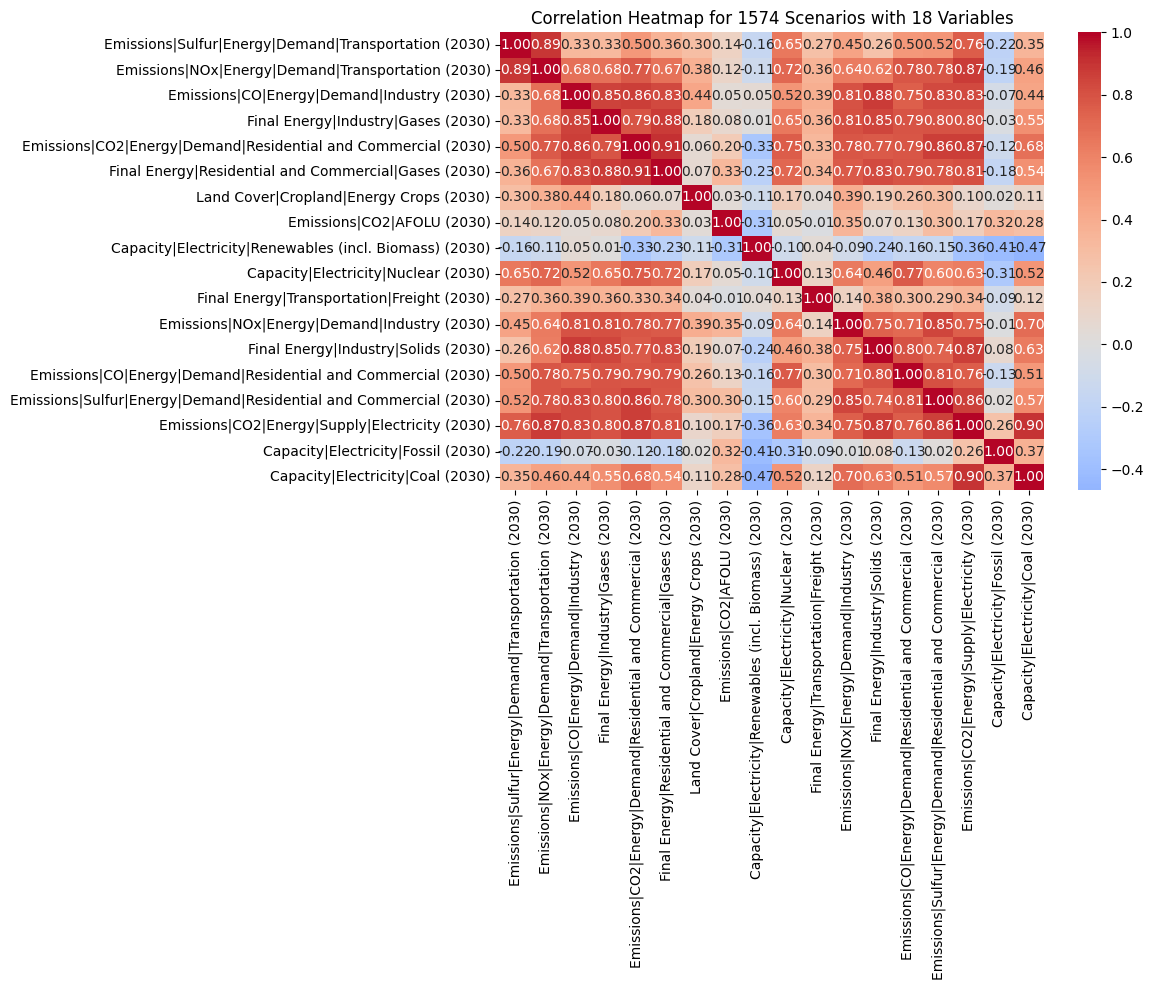


Top 10 Most Correlated Pairs:
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.91
Capacity|Electricity|Coal (2030) & Emissions|CO2|Energy|Supply|Electricity (2030): 0.90
Emissions|NOx|Energy|Demand|Transportation (2030) & Emissions|Sulfur|Energy|Demand|Transportation (2030): 0.89
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Solids (2030): 0.88
Final Energy|Industry|Gases (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.88
Emissions|CO2|Energy|Supply|Electricity (2030) & Emissions|NOx|Energy|Demand|Transportation (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO2|Energy|Supply|Electricity (2030): 0.87
Emissions|CO2|Energy|Supply|Electricity (2030) & Final Energy|Industry|Solids (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO|Energy|Demand|Industry (2030): 0.86
Emissions|CO2|Energy|Demand|Residentia

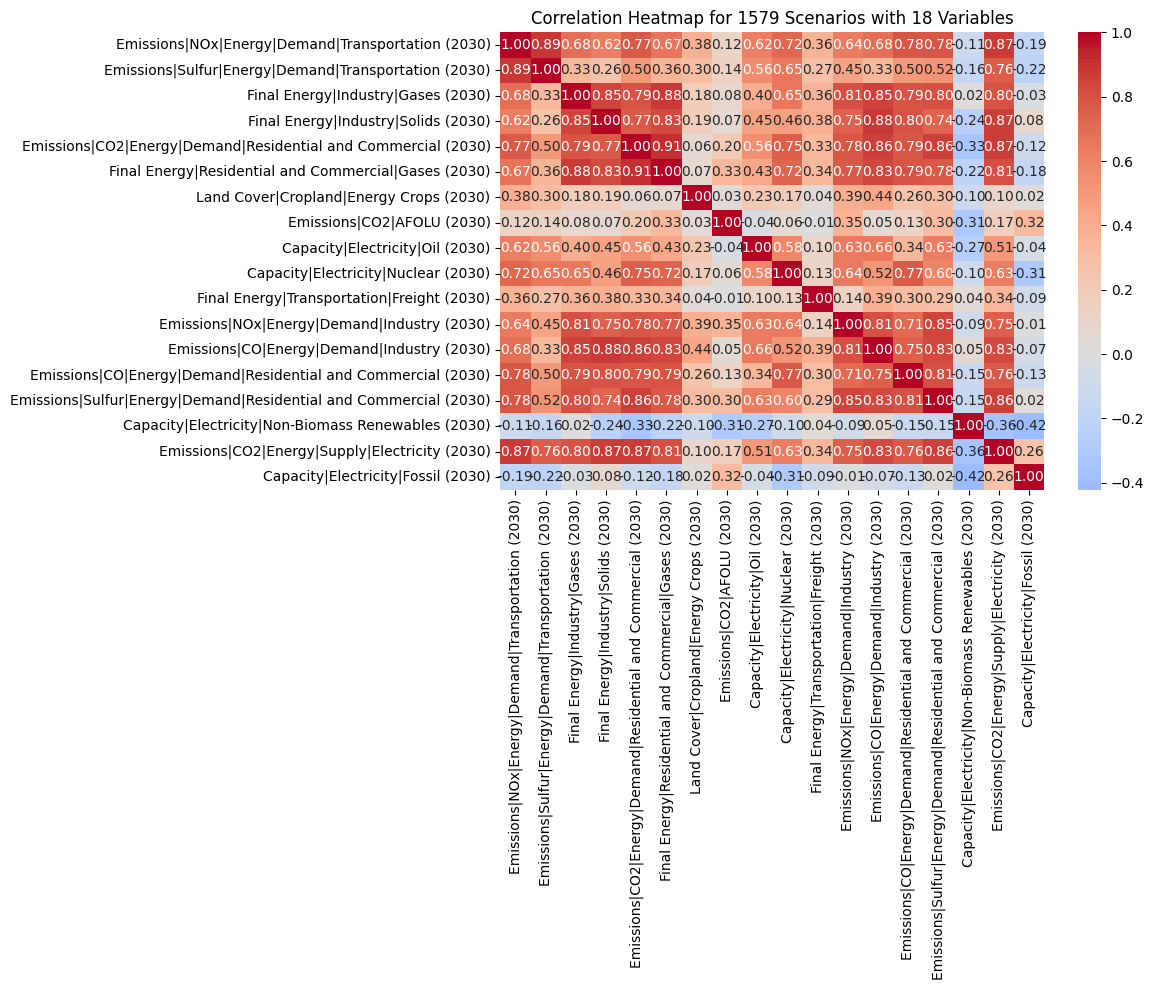


Top 10 Most Correlated Pairs:
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.91
Emissions|NOx|Energy|Demand|Transportation (2030) & Emissions|Sulfur|Energy|Demand|Transportation (2030): 0.89
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Solids (2030): 0.88
Final Energy|Industry|Gases (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.88
Emissions|CO2|Energy|Supply|Electricity (2030) & Emissions|NOx|Energy|Demand|Transportation (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO2|Energy|Supply|Electricity (2030): 0.87
Emissions|CO2|Energy|Supply|Electricity (2030) & Final Energy|Industry|Solids (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO|Energy|Demand|Industry (2030): 0.86
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|Sulfur|Energy|Demand|Residential and Commercial (203

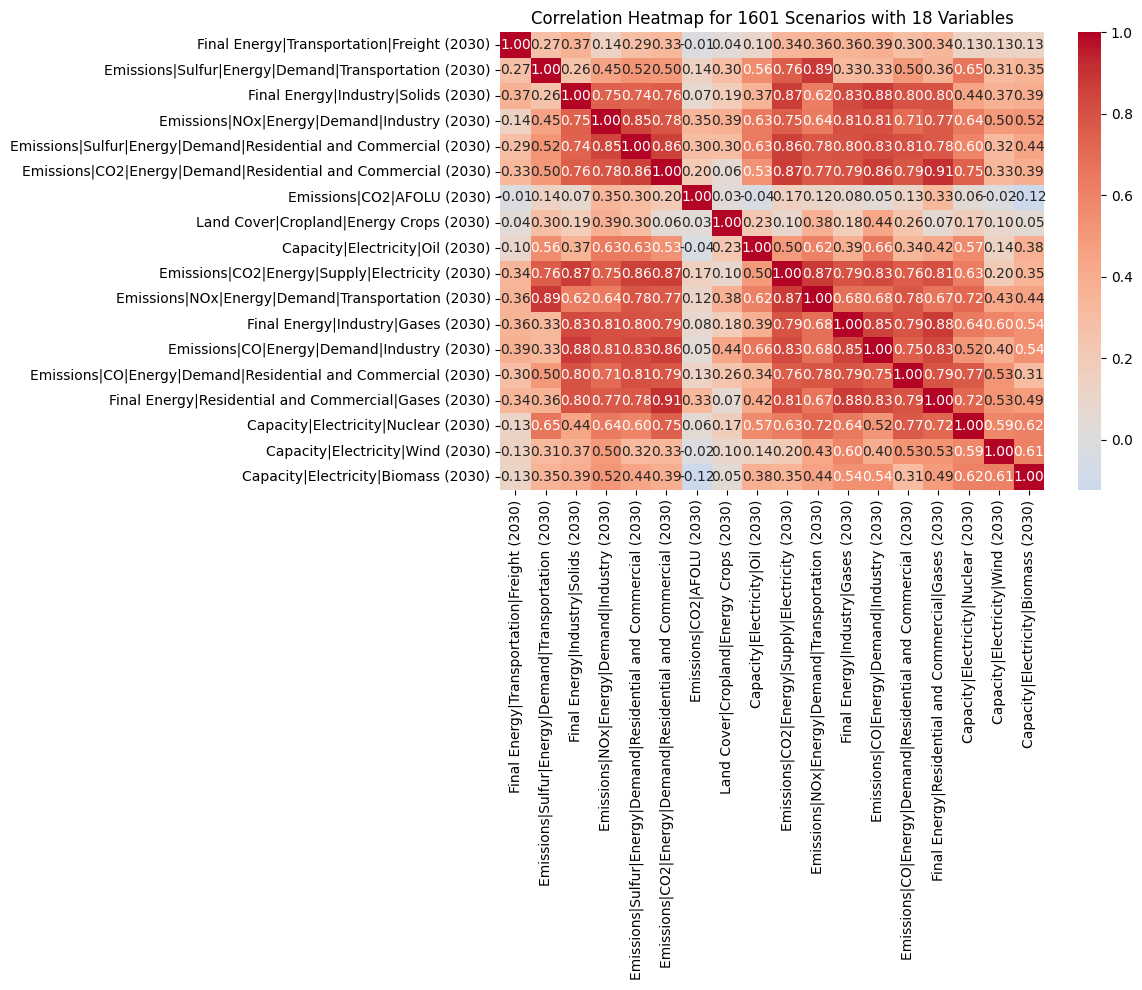


Top 10 Most Correlated Pairs:
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.91
Emissions|NOx|Energy|Demand|Transportation (2030) & Emissions|Sulfur|Energy|Demand|Transportation (2030): 0.89
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Solids (2030): 0.88
Final Energy|Industry|Gases (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.88
Emissions|CO2|Energy|Supply|Electricity (2030) & Emissions|NOx|Energy|Demand|Transportation (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO2|Energy|Supply|Electricity (2030): 0.87
Emissions|CO2|Energy|Supply|Electricity (2030) & Final Energy|Industry|Solids (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO|Energy|Demand|Industry (2030): 0.86
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|Sulfur|Energy|Demand|Residential and Commercial (203

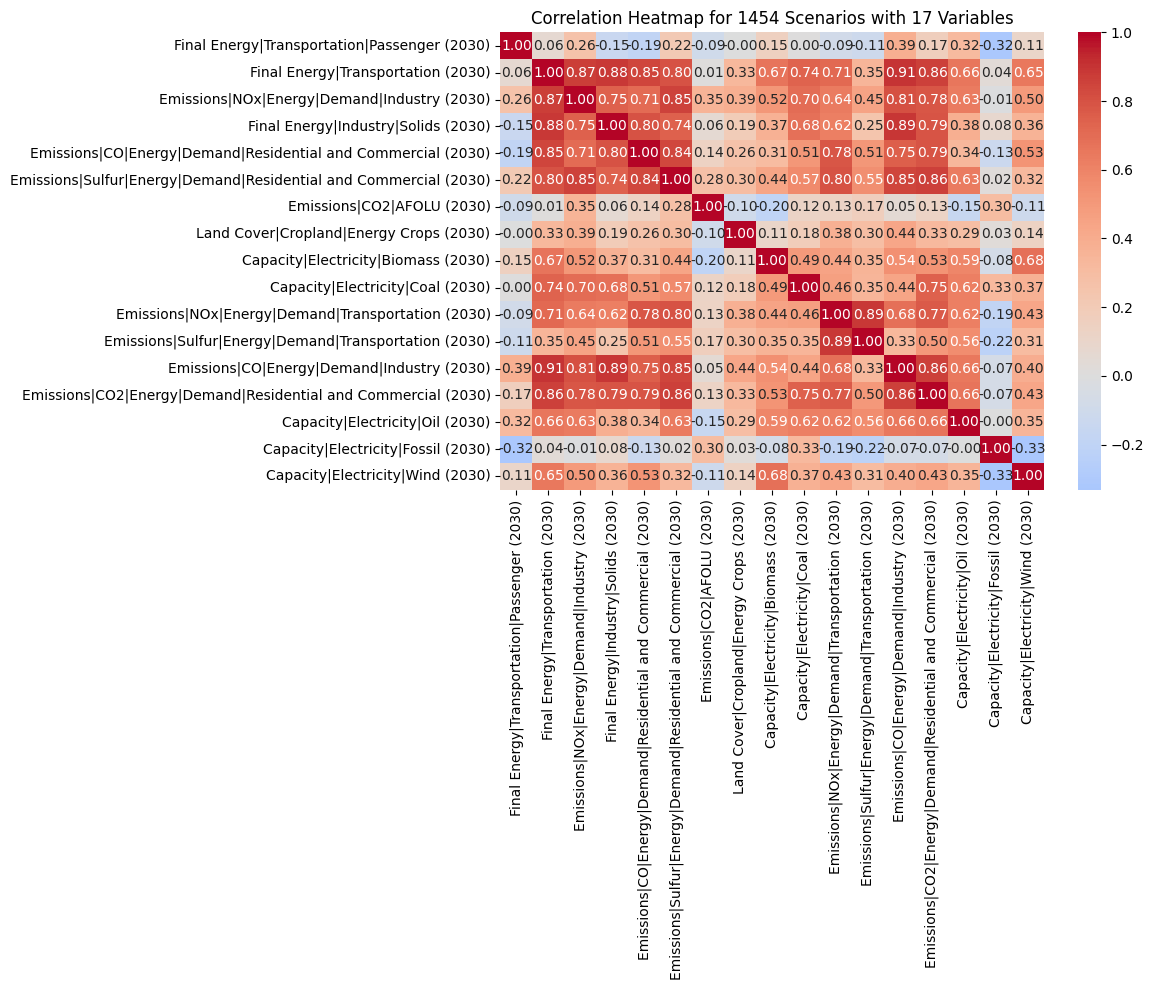


Top 10 Most Correlated Pairs:
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Transportation (2030): 0.91
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Solids (2030): 0.89
Emissions|NOx|Energy|Demand|Transportation (2030) & Emissions|Sulfur|Energy|Demand|Transportation (2030): 0.89
Final Energy|Industry|Solids (2030) & Final Energy|Transportation (2030): 0.88
Emissions|NOx|Energy|Demand|Industry (2030) & Final Energy|Transportation (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO|Energy|Demand|Industry (2030): 0.86
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|Sulfur|Energy|Demand|Residential and Commercial (2030): 0.86
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Final Energy|Transportation (2030): 0.86
Emissions|NOx|Energy|Demand|Industry (2030) & Emissions|Sulfur|Energy|Demand|Residential and Commercial (2030): 0.85
Emissions|CO|Energy|Demand|Residential and Commer

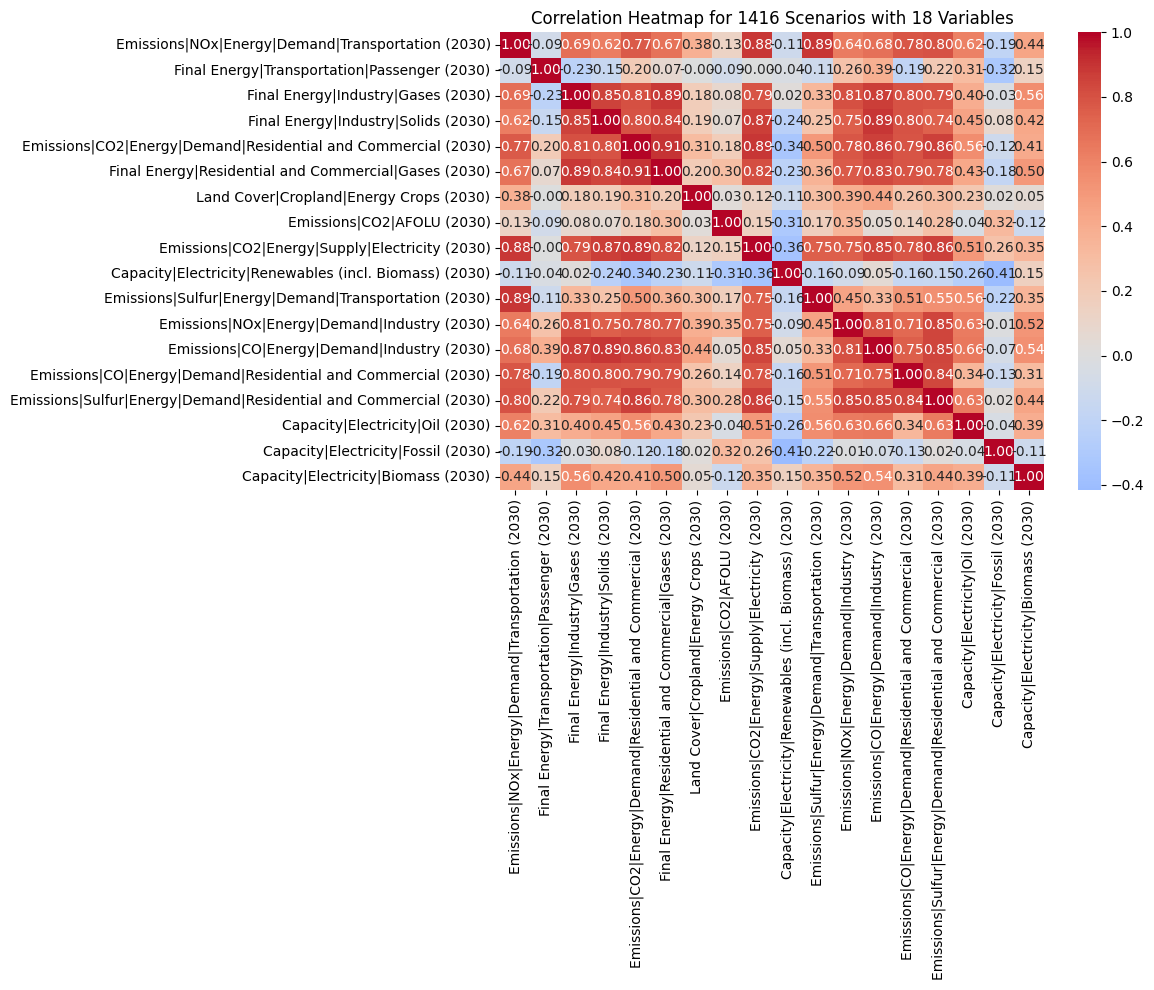


Top 10 Most Correlated Pairs:
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.91
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Solids (2030): 0.89
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO2|Energy|Supply|Electricity (2030): 0.89
Emissions|NOx|Energy|Demand|Transportation (2030) & Emissions|Sulfur|Energy|Demand|Transportation (2030): 0.89
Final Energy|Industry|Gases (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.89
Emissions|CO2|Energy|Supply|Electricity (2030) & Emissions|NOx|Energy|Demand|Transportation (2030): 0.88
Emissions|CO2|Energy|Supply|Electricity (2030) & Final Energy|Industry|Solids (2030): 0.87
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Gases (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO|Energy|Demand|Industry (2030): 0.86
Emissions|CO2|Energy|Supply|Electricity 

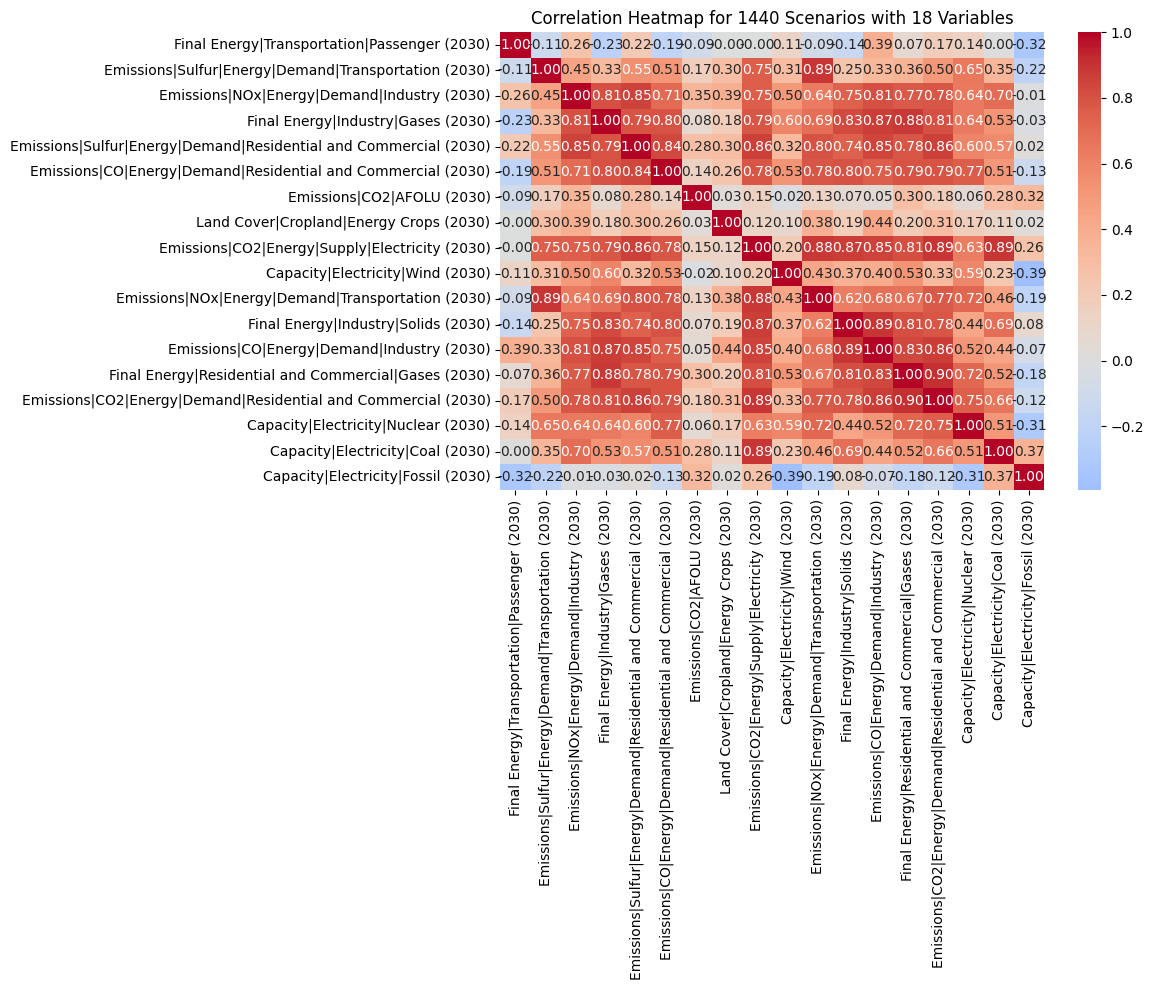


Top 10 Most Correlated Pairs:
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.90
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Solids (2030): 0.89
Capacity|Electricity|Coal (2030) & Emissions|CO2|Energy|Supply|Electricity (2030): 0.89
Emissions|NOx|Energy|Demand|Transportation (2030) & Emissions|Sulfur|Energy|Demand|Transportation (2030): 0.89
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & Emissions|CO2|Energy|Supply|Electricity (2030): 0.89
Final Energy|Industry|Gases (2030) & Final Energy|Residential and Commercial|Gases (2030): 0.88
Emissions|CO2|Energy|Supply|Electricity (2030) & Emissions|NOx|Energy|Demand|Transportation (2030): 0.88
Emissions|CO2|Energy|Supply|Electricity (2030) & Final Energy|Industry|Solids (2030): 0.87
Emissions|CO|Energy|Demand|Industry (2030) & Final Energy|Industry|Gases (2030): 0.87
Emissions|CO2|Energy|Demand|Residential and Commercial (2030) & E

In [396]:
for i, entry in enumerate(results):
    print(f"Combo {i+1}: {entry['n_scenarios']} scenarios — {entry['variables']}")
    make_heat_map(df_pivot, entry['variables'], plot=True)

In [457]:
results[5]

{'variables': ['Final Energy|Transportation|Passenger',
  'Emissions|Sulfur|Energy|Demand|Transportation',
  'Emissions|NOx|Energy|Demand|Industry',
  'Final Energy|Industry|Gases',
  'Emissions|Sulfur|Energy|Demand|Residential and Commercial',
  'Emissions|CO|Energy|Demand|Residential and Commercial',
  'Emissions|CO2|AFOLU',
  'Land Cover|Cropland|Energy Crops',
  'Emissions|CO2|Energy|Supply|Electricity',
  'Capacity|Electricity|Wind',
  'Final Energy|Industry|Solids',
  'Emissions|CO|Energy|Demand|Industry',
  'Final Energy|Residential and Commercial|Gases',
  'Emissions|CO2|Energy|Demand|Residential and Commercial',
  'Capacity|Electricity|Nuclear',
  'Capacity|Electricity|Coal',
  'Capacity|Electricity|Fossil'],
 'n_scenarios': 1439,
 'max_corr': np.float64(0.899678835270679)}

In [ ]:
candidate_vars = results[5]['variables'] 
#remove one variable 
candidate_vars.remove("Emissions|NOx|Energy|Demand|Transportation")

ValueError: list.remove(x): x not in list

In [459]:
candidate_vars.remove("Final Energy|Industry|Gases")

In [469]:
len(candidate_vars)

16

In [474]:
# 2. Run with empty core_vars, and threshold=8 for 2030 + 2050
n_retained, d_df = retained_scenarios(df_pivot, candidate_vars, core_vars=[], years =[2030, 2050], threshold=15)

print(f"Scenarios retained (2030 + 2050): {n_retained}")

# 3. Flatten MultiIndex and reset index
df_final = d_df.copy()
df_final.columns = [f"{var} ({year})" for var, year in df_final.columns]
df_final = df_final.reset_index()

Scenarios retained (2030 + 2050): 599


In [471]:
df_final

,model,scenario,Final Energy|Transportation|Passenger (2030),Final Energy|Transportation|Passenger (2050),Emissions|Sulfur|Energy|Demand|Transportation (2030),Emissions|Sulfur|Energy|Demand|Transportation (2050),Emissions|NOx|Energy|Demand|Industry (2030),Emissions|NOx|Energy|Demand|Industry (2050),Emissions|Sulfur|Energy|Demand|Residential and Commercial (2030),Emissions|Sulfur|Energy|Demand|Residential and Commercial (2050),...,Final Energy|Residential and Commercial|Gases (2030),Final Energy|Residential and Commercial|Gases (2050),Emissions|CO2|Energy|Demand|Residential and Commercial (2030),Emissions|CO2|Energy|Demand|Residential and Commercial (2050),Capacity|Electricity|Nuclear (2030),Capacity|Electricity|Nuclear (2050),Capacity|Electricity|Coal (2030),Capacity|Electricity|Coal (2050),Capacity|Electricity|Fossil (2030),Capacity|Electricity|Fossil (2050)
0,AIM/CGE 2.1,CO_2Deg2020,21.536900,22.975367,1.455733,0.744033,3.500567,2.175733,0.514467,0.237200,...,14.506233,12.034500,742.500800,574.898400,280.531100,425.404000,604.312367,769.102700,3683.555100,4979.408300
1,AIM/CGE 2.1,CO_2Deg2030,24.027667,16.698433,2.210467,0.460033,5.726633,1.476200,0.919400,0.175033,...,16.390067,5.154033,878.993433,197.410000,250.384133,436.700700,820.769533,548.816933,4434.059600,4285.186800
2,AIM/CGE 2.1,CO_BAU,27.077567,31.901500,2.277833,1.776400,5.949767,4.431233,1.023400,0.454467,...,17.370133,18.128133,916.404567,940.646633,217.655500,290.125833,939.320567,1150.946700,4825.179800,6189.796200
3,AIM/CGE 2.1,CO_Bridge,22.097700,20.373633,1.737133,0.721767,4.180833,2.165000,0.606800,0.223967,...,14.686167,10.530867,771.471333,511.635833,258.567100,407.387433,647.278333,390.106633,3834.137600,3580.899100
4,AIM/CGE 2.1,CO_CurPol,25.703233,29.924467,2.289867,1.749500,6.135567,4.443333,1.034933,0.454833,...,16.841900,17.855500,932.166733,946.442467,233.842767,315.647133,840.833833,1067.060000,4492.662000,5845.223800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,WITCH 5.0,EN_NPi2020_800f,2371.715494,8553.901586,0.238657,0.141093,2.461968,1.554282,0.763189,0.160259,...,3.835446,4.011963,482.284661,428.259860,77.270790,68.094010,249.779684,136.649817,2945.277412,1653.611979
241,WITCH 5.0,EN_NPi2020_900,2371.714241,8608.179124,0.232532,0.136444,2.437577,1.544254,0.754230,0.158376,...,3.767001,3.945531,472.452392,416.037313,77.437883,67.445500,250.131085,137.114036,2935.615597,1646.560167
242,WITCH 5.0,EN_NPi2020_900f,2371.113504,8080.058481,0.243515,0.148117,2.481176,1.571323,0.771034,0.166753,...,3.937486,4.054116,492.461548,442.104303,77.034314,68.017801,249.646204,136.610531,2962.525126,1670.881634
243,WITCH 5.0,EN_NPi2100,2365.812755,4759.720728,0.280101,0.222438,2.881069,2.050714,0.899098,0.332513,...,4.927936,5.837429,531.682601,649.545399,71.345424,61.301401,288.016089,173.441840,3591.790668,2337.910659


In [475]:
#Save the final DataFrame to a CSV
df_final.to_csv("selected_data_599.csv", index=False)